In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
df.shape

(9994, 11)

In [7]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,7/12/2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,6/6/2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [8]:
df = df.drop_duplicates()


In [9]:

missing = df.isnull().sum()
print(missing)


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [10]:
'''Convert Date column to DateTime format'''
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

df["Category"] = df["Category"].astype("category")


In [11]:
df["City"] = df["City"].str.strip().str.lower()


In [12]:

from scipy import stats
df = df[(np.abs(stats.zscore(df["Sales"])) < 3)]


In [13]:
print(df.dtypes)


Order ID                 object
Customer Name            object
Category               category
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object


The top 10 KPI's would be useful for the Supermart are :-

Total Sales – Total revenue generated from all orders.
Total Profit – Total profit after discounts and costs.
Profit Margin – Profit as a percentage of sales.
Average Order Value (AOV) – Average sales amount per order.
Sales by Region/State – Sales distribution across geography.
Profit by Region/State – Profit distribution geographically.
Top-Selling Categories/Sub-Categories – Based on sales volume.
Most Profitable Categories/Sub-Categories – Based on total profit.
Customer Frequency – Number of orders per customer.
Discount Impact – Effect of discount on sales and profit.

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
'''Converting order date to date time format '''

'Converting order date to date time format '

In [15]:
df['Profit Margin'] = df['Profit'] / df['Sales']
'''Now here we are adding a conditonal column of Profit margin in DataFrame '''

'Now here we are adding a conditonal column of Profit margin in DataFrame '

In [16]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Profit Margin
0,OD1,Harish,Oil & Masala,Masalas,vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,0.32
1,OD2,Sudha,Beverages,Health Drinks,krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,0.39


In [17]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df['Sales'].mean()
avg_profit_margin = df['Profit Margin'].mean()
sales_by_region = df.groupby('Region')[['Sales', 'Profit']].sum()
top_categories_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_categories_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
discount_corr = df[['Discount', 'Sales', 'Profit']].corr()

C:\Users\Kapil\AppData\Local\Temp\ipykernel_1104\1578375827.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
C:\Users\Kapil\AppData\Local\Temp\ipykernel_1104\1578375827.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)


In [18]:
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Average Order Value: {avg_order_value}")
print(f"Average Profit Margin: {avg_profit_margin}")
print("\nSales by Region:\n", sales_by_region)
print("\nTop Categories by Sales:\n", top_categories_sales)
print("\nTop Categories by Profit:\n", top_categories_profit)
print("\nCorrelation Matrix:\n", discount_corr)

Total Sales: 14956982
Total Profit: 3747121.1999999997
Average Order Value: 1496.5961576946167
Average Profit Margin: 0.25022813688212936

Sales by Region:
            Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61

Top Categories by Sales:
 Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64

Top Categories by Profit:
 Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64

Correlation Matrix:
           Discount     Sales    Profit
Discount  1.000000 -0.005512  0

<Figure size 1200x600 with 0 Axes>

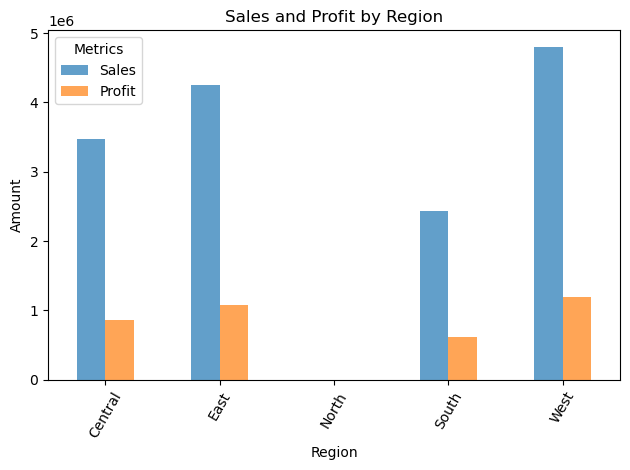

In [19]:
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', alpha=0.7)
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.xlabel('Region')
plt.xticks(rotation=60)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

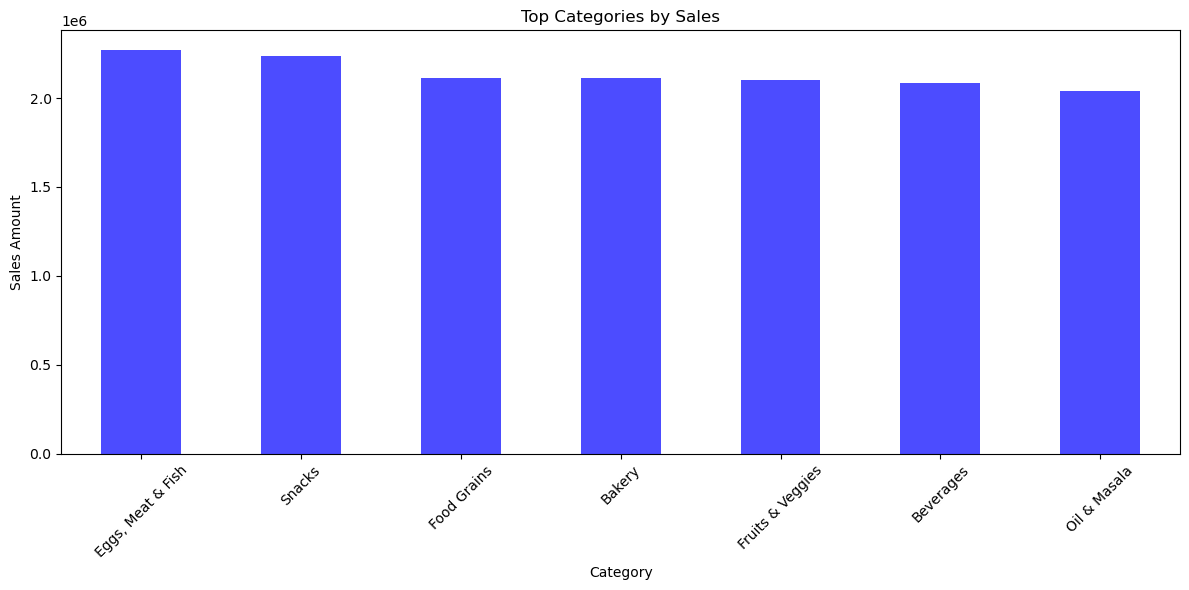

In [20]:
plt.figure(figsize=(12, 6))
top_categories_sales.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top Categories by Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

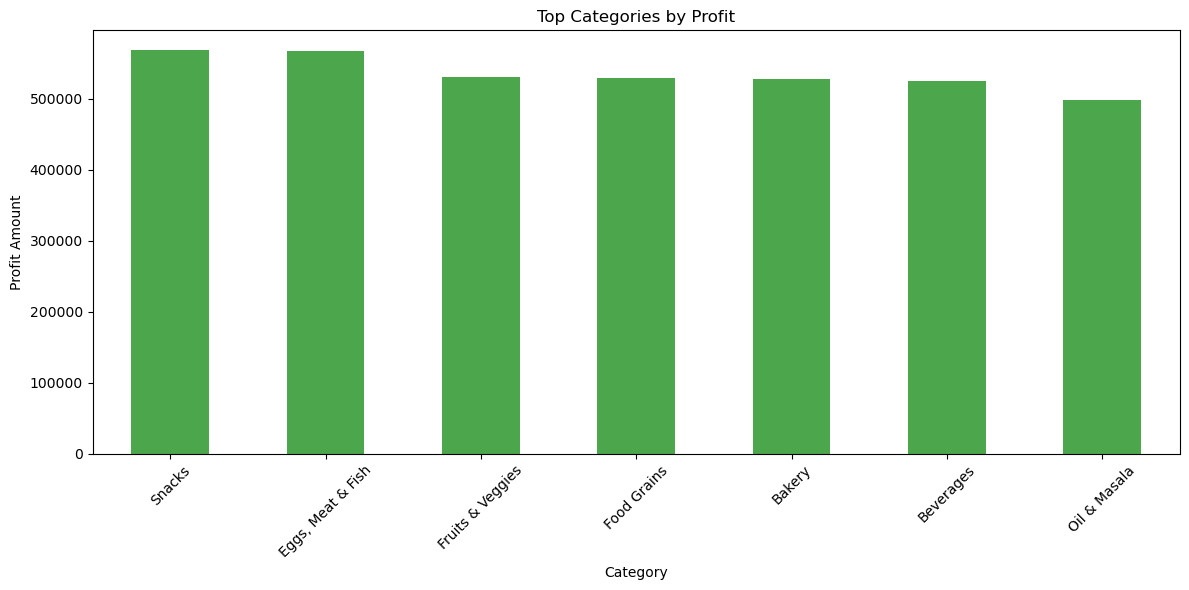

In [21]:
plt.figure(figsize=(12, 6))
top_categories_profit.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top Categories by Profit')
plt.ylabel('Profit Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

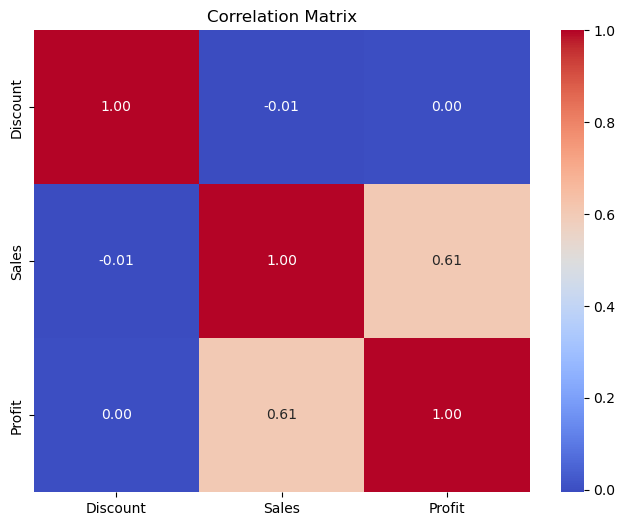

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(discount_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]

sales_outliers = detect_outliers(df, 'Sales')
profit_outliers = detect_outliers(df, 'Profit')


In [24]:
print("Outliers in Sales:")
display(sales_outliers)
print("Outliers in Profit:")
display(profit_outliers)

Outliers in Sales:


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Profit Margin


Outliers in Profit:


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Profit Margin
1115,OD1116,Vinne,"Eggs, Meat & Fish",Chicken,madurai,2017-07-04,West,2439,0.30,1097.55,Tamil Nadu,0.45
1299,OD1300,James,Beverages,Soft Drinks,ramanadhapuram,2017-08-27,East,2413,0.18,1085.85,Tamil Nadu,0.45
1304,OD1305,Akash,Fruits & Veggies,Organic Vegetables,salem,2017-12-01,East,2432,0.34,1094.40,Tamil Nadu,0.45
1767,OD1768,Ganesh,Bakery,Breads & Buns,pudukottai,2017-03-08,South,2395,0.22,1053.80,Tamil Nadu,0.44
1807,OD1808,Esther,Bakery,Biscuits,trichy,2018-11-21,West,2429,0.11,1093.05,Tamil Nadu,0.45
1897,OD1898,Vinne,Fruits & Veggies,Organic Vegetables,perambalur,2016-09-05,West,2341,0.19,1053.45,Tamil Nadu,0.45
1998,OD1999,Shah,Bakery,Breads & Buns,karur,2018-10-02,West,2399,0.12,1079.55,Tamil Nadu,0.45
2535,OD2536,Haseena,Food Grains,Dals & Pulses,dharmapuri,2016-10-31,West,2323,0.31,1045.35,Tamil Nadu,0.45
2714,OD2715,Veronica,Fruits & Veggies,Organic Fruits,nagercoil,2018-09-15,East,2460,0.24,1082.40,Tamil Nadu,0.44
2836,OD2837,Suresh,Bakery,Cakes,tirunelveli,2017-11-10,East,2439,0.25,1073.16,Tamil Nadu,0.44


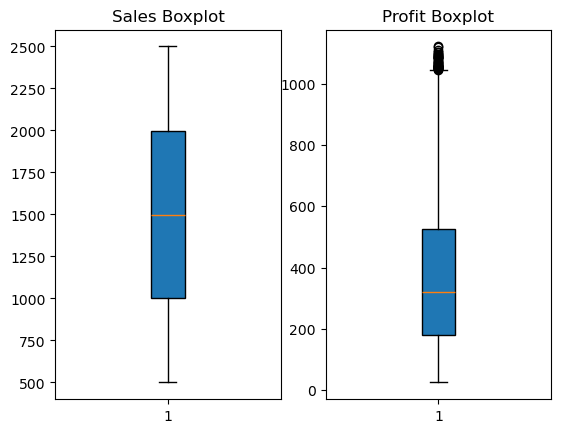

In [25]:
plt.subplot(1, 2, 1)
plt.boxplot(df['Sales'], patch_artist=True)
plt.title('Sales Boxplot')
plt.subplot(1, 2, 2)
plt.boxplot(df['Profit'], patch_artist=True)
plt.title('Profit Boxplot')
plt.show()

In [26]:
''' Removing outliers bt using caping method '''
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR


df['Profit'] = df['Profit'].clip(lower=lower_cap, upper=upper_cap)


In [27]:
''' Here We are checking all outliers was clear or not '''
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]


In [28]:
profit_outliers_after_capping = detect_outliers(df, 'Profit')
print(f"Number of outliers after capping: {len(profit_outliers_after_capping)}")


Number of outliers after capping: 0


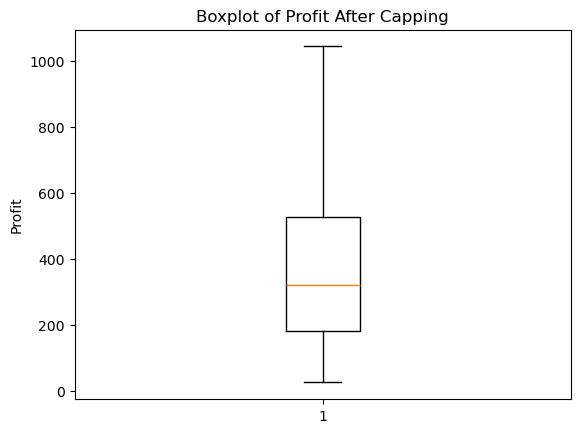

In [29]:
import matplotlib.pyplot as plt

plt.boxplot(df['Profit'])
plt.title("Boxplot of Profit After Capping")
plt.ylabel("Profit")
plt.show()


In [30]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [31]:
''' Here we are using Apirori Algorithms to check the frequently bought items '''
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Create basket — assume Order ID groups a transaction
basket = df.groupby('Order ID')['Sub Category'].apply(list)

# Step 2: Convert to one-hot encoding
te = TransactionEncoder()
basket_encoded = te.fit(basket).transform(basket)
basket_df = pd.DataFrame(basket_encoded, columns=te.columns_)

# Step 3: Apply Apriori
frequent_itemsets = apriori(basket_df, min_support=0.05, use_colnames=True)

# Step 4: Get association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show top rules
rules.sort_values(by='confidence', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [32]:
strong_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [33]:
df['Order ID'].value_counts().head(10)


Order ID
OD1       1
OD6666    1
OD6659    1
OD6660    1
OD6661    1
OD6662    1
OD6663    1
OD6664    1
OD6665    1
OD6667    1
Name: count, dtype: int64

In [34]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Order Week'] = df['Order Date'].dt.to_period('W').astype(str)

basket_df = df.groupby(['Customer Name', 'Order Week'])['Sub Category'].apply(list).reset_index()
baskets = basket_df['Sub Category'].tolist()

te = TransactionEncoder()
te_data = te.fit_transform(baskets)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

frequent_items = apriori(df_encoded, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,support,confidence,lift
2,(Cookies),(Fish),0.005850,0.068627,1.134249
3,(Fish),(Cookies),0.005850,0.096685,1.134249
0,(Breads & Buns),(Soft Drinks),0.009193,0.112705,1.018600
1,(Soft Drinks),(Breads & Buns),0.009193,0.083082,1.018600


In [38]:
import pandas as pd

df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
print(df.columns.tolist())


['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


In [39]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Group sub-categories per order
grouped = df.groupby('Order ID')['Sub Category'].apply(list)

# Convert transactions to one-hot encoding
te = TransactionEncoder()
te_data = te.fit_transform(grouped)
df_te = pd.DataFrame(te_data, columns=te.columns_)

# Run Apriori algorithm
frequent_itemsets = apriori(df_te, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Data Prepration 

In [51]:
df_model = df.copy()

# Add time-based features
df_model['Order Date'] = pd.to_datetime(df_model['Order Date'])
df_model['Order_Month'] = df_model['Order Date'].dt.month
df_model['Order_Weekday'] = df_model['Order Date'].dt.weekday

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['Region'] = le.fit_transform(df_model['Region'])
df_model['State'] = le.fit_transform(df_model['State'])

# Targets
y_sales = df_model['Category']
y_profit = df_model['Sub Category']

# New feature set
X = df_model[['Region', 'State', 'Sales', 'Profit', 'Discount', 'Order_Month', 'Order_Weekday']]

Data Classification

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.3, random_state=42)
X_train2, X_test2, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.3, random_state=42)

# Train models
model_sales = RandomForestClassifier(random_state=42)
model_sales.fit(X_train, y_train_sales)

model_profit = RandomForestClassifier(random_state=42)
model_profit.fit(X_train2, y_train_profit)

# Evaluation
print(" Category Prediction (Sales):")
print(classification_report(y_test_sales, model_sales.predict(X_test)))

print("Sub-Category Prediction (Profit):")
print(classification_report(y_test_profit, model_profit.predict(X_test2)))

 Category Prediction (Sales):
                   precision    recall  f1-score   support

           Bakery       0.12      0.15      0.13       395
        Beverages       0.14      0.12      0.13       436
Eggs, Meat & Fish       0.16      0.18      0.17       433
      Food Grains       0.15      0.15      0.15       425
 Fruits & Veggies       0.12      0.11      0.12       442
     Oil & Masala       0.11      0.13      0.12       371
           Snacks       0.16      0.13      0.15       497

         accuracy                           0.14      2999
        macro avg       0.14      0.14      0.14      2999
     weighted avg       0.14      0.14      0.14      2999

Sub-Category Prediction (Profit):
                    precision    recall  f1-score   support

      Atta & Flour       0.01      0.01      0.01       110
          Biscuits       0.03      0.04      0.04       135
     Breads & Buns       0.02      0.03      0.03       133
             Cakes       0.09      0.08    

Implement Non -Volatile Feature (Data Versoning)

In [54]:
from datetime import datetime

if 'Record_Version' not in df_class.columns:
    df_class['Record_Version'] = 1
    df_class['Last_Modified'] = datetime.now()

def log_update(df, index, new_data: dict):
    original = df.iloc[index].copy()
    new_row = original.copy()

    for key, value in new_data.items():
        new_row[key] = value
    
    new_row['Record_Version'] += 1
    new_row['Last_Modified'] = datetime.now()

    new_row_df = pd.DataFrame([new_row])

    return pd.concat([df, new_row_df], ignore_index=True)
df_class = log_update(df_class, 0, {'Profit': 999})


In [55]:
print(df_class.tail(2))

     Order ID Customer Name  Category  Sub Category     City Order Date  \
9995      OD1        Harish         5            14  Vellore  11/8/2017   
9996      OD1        Harish         5            14  Vellore  11/8/2017   

      Region  Sales  Discount  Profit  State  High_Sales  High_Profit  \
9995       2   1254      0.12   999.0      0       False         True   
9996       2   1254      0.12   999.0      0       False         True   

      Record_Version              Last_Modified  
9995               2 2025-06-04 11:17:17.037607  
9996               2 2025-06-04 11:24:50.313818  


Conclusion :- 

In this project, we applied data mining techniques to derive actionable insights from transactional data:

- **Association Rule Mining** revealed key product combinations that are frequently purchased together.
- **Classification models** helped us predict item categories and sub-categories that yield the highest sales and profit across different regions and states.
- We simulated the **Non-Volatile characteristic** of a data warehouse by implementing an append-only update system, preserving all historical changes for accurate and auditable analysis.

These insights can guide strategic decisions in product placement, marketing, inventory management, and regional targeting.

Recommendations:-

1. **Cross-selling strategies** using the frequently bought-together item sets.
2. **Region-wise marketing focus** on high-performing product categories.
3. Use a **non-volatile data warehouse design** to track historical changes in sales, pricing, and product performance.